In [1]:
### Visualizations

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [174]:
df_mlospo = pd.read_csv('merged_ice_core_yearly2.csv', skiprows=range(1, 28))
df_mlospo.reset_index(level=0, inplace=True)
df_mlospo.columns = ['year', 'CO2_ppm']
df_mlospo.year = -(df_mlospo.year-df_mlospo.year.max()+2)

Reference: 

Atmospheric CO2 record based on ice core data before 1958, (Ethridge et. al., 1996; MacFarling Meure et al., 2006) and yearly averages of direct observations from Mauna Loa and the South Pole after and including 1958 (from Scripps CO2 Program).                                               "
in situ data is based on simple average of Mauna Loa and South Pole from values on Jan 1

For Mauna Loa Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m

For South Pole: Latitude 90.0°S Elevation 2810m

Scripps CO2 Source: R. F. Keeling, S. C. Piper, A. F. Bollenbacher and S. J. Walker         Scripps CO2 Program ( http://scrippsco2.ucsd.edu )                                                                        

In [175]:
df_domec = pd.read_table('edc-co2-2008_composite.txt', skiprows=range(1, 117))
df_domec.reset_index(level=0, inplace=True)
df_domec.columns = ['year', 'CO2_ppm']

Reference:

Luthi, D., et al.. 2008. EPICA Dome C Ice Core 800KYr Carbon Dioxide Data. IGBP PAGES/World Data Center for Paleoclimatology 

Data Contribution Series # 2008-055. 

NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.

In [176]:
years = []
co2 = []
for ik in range(len(df_domec['CO2_ppm'])):
    pair = df_domec['CO2_ppm'][ik].split()
    years.append(int(pair[0]))
    co2.append(float(pair[1]))
    
df_domec['year'] = np.array(years)+17
df_domec['CO2_ppm']= np.array(co2)

In [177]:
df_cbudget = pd.read_csv('data/global-carbon-budget.csv')
#conversion factor 2.12 GtC/ppm CO2

Reference:

https://github.com/openclimatedata/global-carbon-budget/blob/master/doc/ocean-sink.md

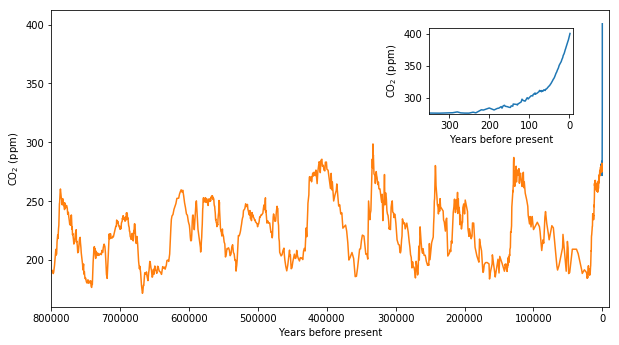

In [182]:

fig = plt.figure(1, figsize=(10, 12))
ax2 = plt.subplot(211)

left, bottom, width, height = [0.65, 0.76, 0.2, 0.1]
ax1 = fig.add_axes([left, bottom, width, height])

ax1.plot(df_mlospo.year, df_mlospo.CO2_ppm)

ax1.set_ylim([275,410])
ax1.set_xlim([350,-10])
ax1.set_ylabel('CO$_2$ (ppm)')
ax1.set_xlabel('Years before present')

ax2.plot(df_mlospo.year, df_mlospo.CO2_ppm)
ax2.plot(df_domec.year, df_domec.CO2_ppm)
ax2.set_xlim([df_domec.year.max()+10000, df_mlospo.year.max()-30000])

ax2.set_xlim([800000,-10000])
ax2.set_ylabel('CO$_2$ (ppm)')
ax2.set_xlabel('Years before present')

plt.show()

The main figure shows the timeseries of the concentration of CO$_2$ in the atmosphere over the last 800,000 years as measured in bubbles preserved in ice in Antarctica. The inset and the blue segment present data from the last 2000 years as captured in ice in Antarctica and continued by flask samples of air taken from the Mauna Loa Observatory in Hawaii and the South Pole Observatory in Antartica and averaged.  Taken together, it is evident that preindustrial CO$_2$ varied, but remained between 172 and 300 ppm, and that our current trajectory is a symptom of anthropogenic CO$_2$. 

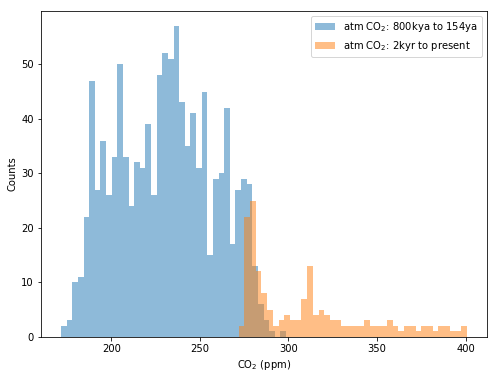

In [179]:
fig = plt.figure(1, figsize=(8, 6))

hist1 = plt.hist(df_domec['CO2_ppm'], bins = 40, alpha = .5, label = 'atm CO$_2$: 800kya to 154ya')
hist2 = plt.hist(df_mlospo.CO2_ppm, alpha = .5, bins = 40, label ='atm CO$_2$: 2kyr to present ')
plt.legend()
plt.xlabel('CO$_2$ (ppm)')
plt.ylabel('Counts')

Put another way, these histograms show that preindustrial CO$_2$ were clustered (with some structure) between 171 and 300 ppm, whereas measurements from the last 2000 years show a departure from the preindustrial range.

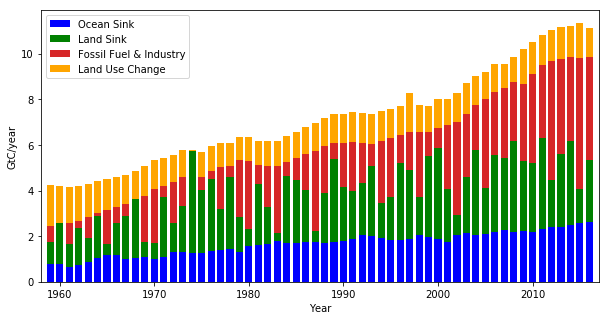

In [181]:
# df2['Ocean-Sink','Land-Sink'].plot.bar(stacked = True)

fig = plt.figure(1, figsize=(10, 5))
p3 = plt.bar(df_cbudget['Year'], df_cbudget['Fossil-Fuel-And-Industry'],color='#d62728',width = .75)
p4 = plt.bar(df_cbudget['Year'], df_cbudget['Land-Use-Change-Emissions'],color = 'orange',width = .75 ,
             bottom=df_cbudget['Fossil-Fuel-And-Industry'])

p1 = plt.bar(df_cbudget['Year'], df_cbudget['Ocean-Sink'], color='blue',width = .75)
p2 = plt.bar(df_cbudget['Year'], df_cbudget['Land-Sink'],color = 'green', width = .75,
             bottom=df_cbudget['Ocean-Sink'])

plt.ylabel('GtC/year')
plt.xlabel('Year')
plt.xlim([1958, 2017])

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Ocean Sink', 'Land Sink', 'Fossil Fuel & Industry', 'Land Use Change'))

This figure of overlapping stacked bar graphs shows how the composite of fossil fuel and industry emissions with emissions due to land use changes (e.g. deforestation) compares to the yearly uptake of carbon by the ocean and the land carbon sinks. It illustrates that, despite an increase in uptake by the ocean, and to some degree the land (much more variable), the gap between carbon uptake and carbon emission has been growing. 

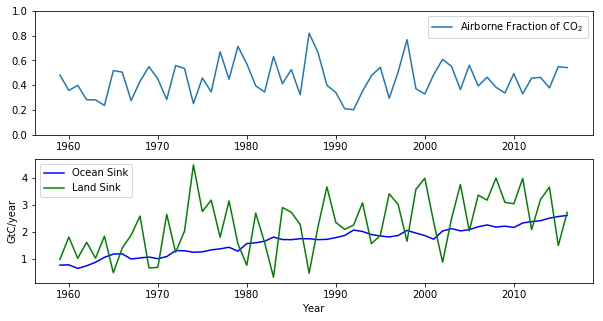

In [180]:
fig= plt.figure(1, figsize=(10, 5))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(df_cbudget['Year'], df_cbudget['Atmospheric-Growth']/(df_cbudget['Fossil-Fuel-And-Industry']+df_cbudget['Land-Use-Change-Emissions']), label = 'Airborne Fraction of CO$_2$')
ax1.set_ylim([0,1])
ax1.legend()

ax2.plot(df_cbudget['Year'], df_cbudget['Ocean-Sink'], label= 'Ocean Sink', color = 'blue')
ax2.plot(df_cbudget['Year'], df_cbudget['Land-Sink'], label = 'Land Sink', color = 'green')
ax2.legend()
ax2.set_ylabel('GtC/year')
ax2.set_xlabel('Year')


Finally, the top figure presents a time series of the airborne fraction of CO$_2$, or the fraction of anthropogenic emissions not taken up by the ocean or land carbon sink on a yearly basis. It is a very noisy index, but is interesting because it suggests that the rate of sink uptake increases with increase in the rate of change of atmospheric CO$_2$, otherwise there would be a trend visible through the noise.  The bottom figure shows timeseries of ocean and land uptake, providing evidence that both sinks are increasing uptake in the face of increasing atmospheric CO$_2$.

## GRAVEYARD

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Fossil-Fuel-And-Industry   R-squared:                       0.955
Model:                                  OLS   Adj. R-squared:                  0.954
Method:                       Least Squares   F-statistic:                     1193.
Date:                      Fri, 24 Aug 2018   Prob (F-statistic):           1.93e-39
Time:                              15:00:01   Log-Likelihood:                 63.972
No. Observations:                        58   AIC:                            -123.9
Df Residuals:                            56   BIC:                            -119.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0790      0.021     50.924      0.000       1.037       1.121
Year           0.0221      0.001     34.533      0.000       0.021       0.023
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.432
Skew:                          -0.146   Prob(JB):                        0.806
Kurtosis:                       2.694   Cond. No.                         65.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

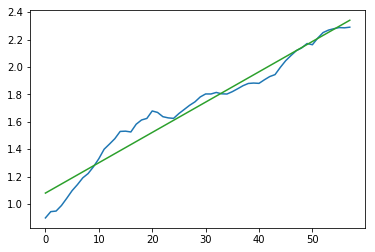

In [150]:
import statsmodels.api as sm

y = np.log(df2['Fossil-Fuel-And-Industry'])
X = df_cbudget.Year-min(df_cbudget.Year)
plt.plot(X, y)

X = sm.add_constant(X)


model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

plt.plot(X, model.params[1]*X +model.params[0])
model.summary()

In [75]:
df_detail = pd.read_csv('monthly_in_situ_co2_mlo.csv', skiprows=range(0, 1))
df_detail.reset_index()
df_detail = df_detail.replace({-99.99: None})
df_detail.columns = ['Yr', 'Month', 'other_Date','Date', 'CO2', 'seasonally_CO2', 'fit','other_seasonally','other_CO2','other_other_seasonally']

In [76]:
from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector, BboxConnectorPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1) * 0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    (xmin,xmax) : the limits of the colored area in both plot axes.

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used ti create
    patches.

    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["alpha"] = 0.2

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=2, loc2a=3, loc1b=1, loc2b=4,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

